In [1]:
import pandas as pd
import numpy as np
import pickle
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import neural_network
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
import sklearn.model_selection
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import sys
from math import sqrt

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

Using TensorFlow backend.


In [4]:
ocr_500=np.load('ocr_500.npy')
tm_500=np.load('tm_500.npy')
p2v2_500=np.load('p2v2_500.npy')
p2v_500=np.load('p2v_500.npy')
p2v3_500=np.load('p2v3_500.npy')
tm_p2v_500=np.load('tm_p2v_500.npy')
tm_p2v2_500=np.load('tm_p2v2_500.npy')
tm_p2v3_500=np.load('tm_p2v3_500.npy')
ocr_tm_500=np.load('ocr_tm_500.npy')
ocr_p2v_500=np.load('ocr_p2v_500.npy')
ocr_p2v2_500=np.load('ocr_p2v2_500.npy')
ocr_p2v3_500=np.load('ocr_p2v3_500.npy')
ocr_tm_p2v_500=np.load('ocr_tm_p2v_500.npy')
ocr_tm_p2v2_500=np.load('ocr_tm_p2v2_500.npy')
ocr_tm_p2v3_500=np.load('ocr_tm_p2v3_500.npy')
Combined_np1=np.load('Combined_np1.npy')
Combined_np2=np.load('Combined_np2.npy')
Combined_np3=np.load('Combined_np3.npy')

In [76]:
ocr_merged=np.load('ocr_merged.npy')
tm_merged=np.load('tm_merged.npy')
p2v3_merged=np.load('p2v3_merged.npy')
p2v2_merged=np.load('p2v2_merged.npy')
p2v_merged=np.load('p2v_merged.npy')
ocr_tm_merged=np.load('ocr_tm_merged.npy')
ocr_p2v_merged=np.load('ocr_p2v_merged.npy')
ocr_p2v2_merged=np.load('ocr_p2v2_merged.npy')
ocr_p2v3_merged=np.load('ocr_p2v3_merged.npy')
tm_p2v_merged=np.load('tm_p2v_merged.npy')
tm_p2v2_merged=np.load('tm_p2v2_merged.npy')
tm_p2v3_merged=np.load('tm_p2v3_merged.npy')
ocr_p2v3_merged=np.load('ocr_p2v3_merged.npy')
ocr_tm_p2v3_merged=np.load('ocr_tm_p2v3_merged.npy')
ocr_tm_p2v2_merged=np.load('ocr_tm_p2v2_merged.npy')
ocr_tm_p2v_merged=np.load('ocr_tm_p2v_merged.npy')

In [103]:
ocr_annox_1000=np.load('ocr_annox_1000.npy')
tm_annox_1000=np.load('tm_annox_1000.npy')
p2v_annox_1000=np.load('p2v_annox_1000.npy')
tm_p2v_annox_1000=np.load('tm_p2v_annox_1000.npy')
ocr_p2v_annox_1000=np.load('ocr_p2v_annox_1000.npy')
ocr_tm_annox_1000=np.load('ocr_tm_annox_1000.npy')

In [104]:
p2v2_annox_1000=np.load('p2v2_annox_1000.npy')
p2v3_annox_1000=np.load('p2v3_annox_1000.npy')
tm_p2v2_annox_1000=np.load('tm_p2v2_annox_1000.npy')
tm_p2v3_annox_1000=np.load('tm_p2v3_annox_1000.npy')
ocr_p2v2_annox_1000=np.load('ocr_p2v2_annox_1000.npy')
ocr_p2v3_annox_1000=np.load('ocr_p2v3_annox_1000.npy')

In [131]:
ocr_tm_p2v_annox_1000=np.load('ocr_tm_p2v_annox_1000.npy')
ocr_tm_p2v2_annox_1000=np.load('ocr_tm_p2v2_annox_1000.npy')
ocr_tm_p2v3_annox_1000=np.load('ocr_tm_p2v3_annox_1000.npy')

In [15]:
df2 = pickle.load(open('df2.pkl', 'rb')) 

In [16]:
df2.head(5)

,ID,Images,OCR,Template_Name,dh_1,dh_2,cln_content,porn_score,profanity_score,pronoun_count,polarity_score,sentiment,avg_rat,min_max
0,1,NaN,當我再差幾秒就遲到時，卻在這幾秒內衝到學校。我。學校。,自信的善逸,0,0,"[當我, 再, 差, 幾秒, 就, 遲到, 時, ，, 卻, 在, 這幾秒, 內, 衝到, ...",0,0,1,0,0,0.0,0.000000
1,2,NaN,當你以為他們要幫你拿倉鼠飼料來餵你吃，但手上卻是拿著兩條蟒蛇加上一個攝影機。,怕爆倉鼠,0,2,"[當你以, 為, 他們, 要, 幫, 你, 拿, 倉鼠, 飼料, 來, 餵, 你, 吃, ，...",0,0,1,0,0,1.0,0.333333
2,3,NaN,紅燈了行人大搖大擺的過馬路。行人。台灣的計程車司機\n,小丑被車撞,0,1,"[紅燈, 了, 行, 人大, 搖大, 擺, 的, 過馬路, 。, 行人, 。, 台灣, 的,...",0,0,0,0,0,0.5,0.166667
3,4,NaN,辛普森家庭從來不會讓我失望。AREA 51 WARNING:DO NOT ENTER!\n\n,51禁區辛普森家族早就知道了,0,0,"[辛普森, 家庭, 從來, 不會, 讓, 我, 失望, 。, AREA, , 51, ,...",0,0,1,-3,-1,0.0,0.000000
4,5,NaN,武漢肺炎疫情日漸嚴重。習近平:,小熊維尼笑,0,1,"[武漢, 肺炎, 疫情, 日漸, 嚴重, 。, 習近, 平, :]",0,0,0,-2,-1,0.5,0.166667


In [17]:
x = ocr_merged
y = df2.iloc[:,13].values

In [63]:
col_mask=df.isnull().any(axis=0)
row_mask=df.isnull().any(axis=1)
df.loc[row_mask,col_mask]

,Images
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
495,NaN
496,NaN
497,NaN
498,NaN


In [5]:
#a=np.ones((501,1))
#b=np.zeros((501,1))
#dh_score=np.vstack((a, b))
#len(dh_score)

1002

## Keras MLP

In [28]:
x = ocr_merged
y = df2.iloc[:,13].values

In [29]:
seed = 1

def baseline_model():
    model = Sequential()
    model.add(Dense(100, input_dim=len(x[0]), activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])
    return model


estimator = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100, verbose=False)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, x, y, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

acc = cross_val_score(estimator,x, y, scoring='r2',cv = kfold)
print("Results: %.2f (%.2f) R2" % (acc.mean(), acc.std()))













Results: -0.10 (0.01) MSE
Results: -0.12 (0.09) R2


In [31]:
#loss: value of loss function for your training data, acc: accuracy value for your training data.
history = estimator.fit(x, y,
                    batch_size=100,
                    epochs=100,
                    verbose=2)                    

Epoch 1/100
 - 1s - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 2/100
 - 0s - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 3/100
 - 0s - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 4/100
 - 0s - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 5/100
 - 0s - loss: 0.0799 - mean_squared_error: 0.0799
Epoch 6/100
 - 0s - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 7/100
 - 0s - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 8/100
 - 0s - loss: 0.0666 - mean_squared_error: 0.0666
Epoch 9/100
 - 0s - loss: 0.0618 - mean_squared_error: 0.0618
Epoch 10/100
 - 0s - loss: 0.0575 - mean_squared_error: 0.0575
Epoch 11/100
 - 0s - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 12/100
 - 0s - loss: 0.0499 - mean_squared_error: 0.0499
Epoch 13/100
 - 0s - loss: 0.0439 - mean_squared_error: 0.0439
Epoch 14/100
 - 0s - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 15/100
 - 0s - loss: 0.0330 - mean_squared_error: 0.0330
Epoch 16/100
 - 0s - loss: 0.0308 - mean_squared_error: 0.0308
E

In [133]:
# summarize history for loss

plt.plot(history.history['mean_squared_error'])
plt.title('p2v3 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

KeyError: 'mean_squared_error'

## MLP Regressor in Scikit Learn

In [164]:
x = ocr_tm_p2v3_annox_1000
y = df2.iloc[:,13].values

In [53]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=1)

In [106]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes=(100,100,100), activation="relu",
                 solver='adam', alpha=0.01,
                 max_fun=15000,
                 early_stopping=True, validation_fraction=0.1,
                 max_iter=1000,tol=1e-4,random_state=1)

In [165]:
mlp.fit(x, y)

MLPRegressor(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=1, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [166]:
cv=KFold(n_splits=10)
scorescrossval=cross_val_score(mlp,x,y,cv=cv,scoring='r2')
losscrossval = -cross_val_score(mlp, x, y, cv=cv, scoring='neg_mean_squared_error')

In [27]:
#nnr_pred = mlp.predict(x_test)
#nny_pred= mlp.predict(x_train)
#list_training_error = []
#list_testing_error = []

In [167]:
print('scores cross val',scorescrossval)
print('Accuracy: %0.2f (+/- %0.2f)'%(scorescrossval.mean(),scorescrossval.std()*2))
print('loss cross val',losscrossval)
print('Average loss:', (losscrossval.mean()))

scores cross val [-0.04178032 -0.04904161 -0.03430207  0.00716283 -0.01542408  0.02072388
 -0.04237957 -0.091287   -0.09769323 -0.02420331]
Accuracy: -0.04 (+/- 0.07)
loss cross val [0.10597203 0.10275144 0.10170637 0.07450691 0.11315209 0.06707769
 0.08227849 0.08602676 0.09019074 0.08415253]
Average loss: 0.09078150632719206


In [ ]:
#scores on training data
neural_network_regression_score = mlp.score(x, y)
neural_network_regression_score

/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % sel

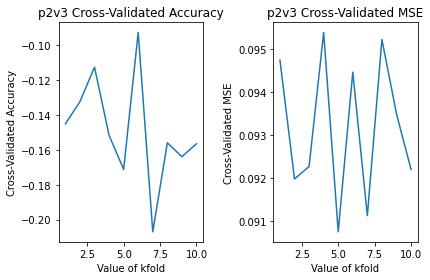

In [12]:
split_range = range(1,11)
r2_scores = []
for cv in split_range:
    mlp = mlp
    scores = cross_val_score(mlp,x,y,scoring='r2')
    r2_scores.append(scores.mean())

plt.subplot(1,2,1)   
plt.plot(split_range,r2_scores)
plt.xlabel('Value of kfold')
plt.ylabel('Cross-Validated Accuracy')
plt.title('p2v3 Cross-Validated Accuracy')
plt.tight_layout()



RMSE_loss = []
for r in split_range:
    mlp=mlp
    loss = -cross_val_score(mlp, x, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_loss .append(loss.mean())
    
plt.subplot(1,2,2)
plt.plot(split_range, RMSE_loss )
plt.xlabel('Value of kfold')
plt.ylabel('Cross-Validated MSE')
plt.title('p2v3 Cross-Validated MSE')
plt.tight_layout()
plt.show()
    #fold_training_score = r2_score(y_train, nny_pred)        
    #fold_testing_score = r2_score(y_test, nnr_pred)
    #list_training_score.append(fold_training_score)
    #list_testing_score.append(fold_testing_score)

    
#plt.subplot(1,2,1)
#plt.plot(range(1, cv.get_n_splits() + 1), np.array(list_training_score).ravel())
#plt.xlabel('number of fold')
#plt.ylabel('training score')
#plt.title('Training score across folds')
#plt.tight_layout()

#plt.subplot(1,2,2)
#plt.plot(range(1, cv.get_n_splits() + 1), np.array(list_testing_score).ravel())
#plt.xlabel('number of fold')
#plt.ylabel('testing score')
#plt.title('Testing score across folds')
#plt.tight_layout()
#plt.show()

In [111]:
# The mean squared error
#print("Root mean squared error: %.2f"
      #% sqrt(mean_squared_error(y_test, nnr_pred)))
# The absolute squared error
#print("Mean absolute error: %.2f"
#print('R-squared: %.2f' % r2_score(y_test, nnr_pred))

Root mean squared error: 0.02
Mean absolute error: 0.01
R-squared: 1.00


## MLP Classifier

In [6]:
x=ocr_tm_p2v_merged
y=dh_score

In [8]:
mlp = MLPClassifier(hidden_layer_sizes=(100,100), max_iter=500,activation = 'relu',solver='adam',random_state=1)

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=2020)
mlp.fit(x_train, y_train)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
def accuracy(confusion_matrix):
   diagonal_sum = confusion_matrix.trace()
   sum_of_all_elements = confusion_matrix.sum()
   return diagonal_sum / sum_of_all_elements
    


In [11]:
mlp.fit(x_train, y_train)

/home/jl8394/humor/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 100), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [18]:
#Predicting y for X_val
#y_pred = mlp.predict(x_train)
predictions = mlp.predict(x_test)

In [19]:
#Importing Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
#Comparing the predictions against the actual observations in y_val
#cm = confusion_matrix(y_pred, y_train)
print(confusion_matrix(y_test,predictions))

[[104  38]
 [ 48 111]]


In [20]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.68      0.73      0.71       142
         1.0       0.74      0.70      0.72       159

    accuracy                           0.71       301
   macro avg       0.71      0.72      0.71       301
weighted avg       0.72      0.71      0.71       301

